C:\Users\Triloki-Gupta\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  
C:\Users\Triloki-Gupta\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
C:\Users\Triloki-Gupta\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


Found 45500 images belonging to 26 classes.
Found 6500 images belonging to 26 classes.
Epoch 1/25
800/800 [==============================] - 312s 390ms/step - loss: 2.0413 - acc: 0.3817 - val_loss: 0.6050 - val_acc: 0.8114
Epoch 2/25
800/800 [==============================] - 279s 349ms/step - loss: 0.7095 - acc: 0.7619 - val_loss: 0.2816 - val_acc: 0.9357
Epoch 3/25
800/800 [==============================] - 284s 355ms/step - loss: 0.4507 - acc: 0.8447 - val_loss: 0.2087 - val_acc: 0.9568
Epoch 4/25
800/800 [==============================] - 272s 340ms/step - loss: 0.3368 - acc: 0.8842 - val_loss: 0.1747 - val_acc: 0.9640
Epoch 5/25
800/800 [==============================] - 286s 358ms/step - loss: 0.2638 - acc: 0.9097 - val_loss: 0.1310 - val_acc: 0.9708
Epoch 6/25
800/800 [==============================] - 282s 352ms/step - loss: 0.2357 - acc: 0.9160 - val_loss: 0.1355 - val_acc: 0.9805
Epoch 7/25
800/800 [==============================] - 293s 367ms/step - loss: 0.1995 - acc: 0.927

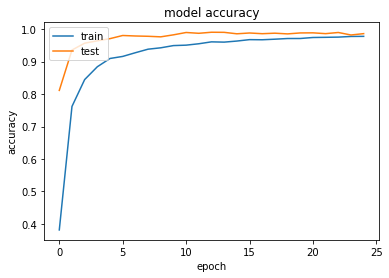

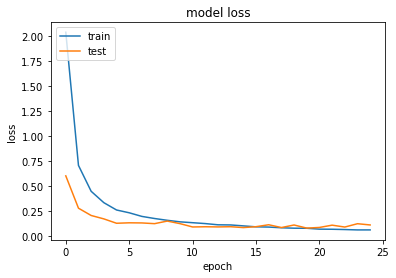

In [2]:
# Part 1 - Building the CNN
#importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers

# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Convolution2D(32, 3,  3, input_shape = (64, 64, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

#Adding 3rd Concolution Layer
classifier.add(Convolution2D(64, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(26, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'E:\\M.Tech_Project\\Simple-Sign-Language-Detector-master\\mydata\\training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'E:\\M.Tech_Project\\Simple-Sign-Language-Detector-master\\mydata\\test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=800,
        epochs=25,
        validation_data = test_set,
        validation_steps = 6500
      )

#Saving the model
import h5py
classifier.save('E:\\M.Tech_Project\\Simple-Sign-Language-Detector-master\\Trained_model.h5')
print(model.history.keys())

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
